# Churn Prediction
- We want to find the customers leaving our company. 
- Classification has 2 types:
    1. Binary
    2. Multi class
- Here we are using Binary Classification.

    $ g(x_{i})=y_{i} $

    $ y \in {0,1} $
    and $i$ is the ith customer

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Fetch data

In [4]:
!curl -o "data.csv" "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 22  954k   22  218k    0     0   246k      0  0:00:03 --:--:--  0:00:03  248k
100  954k  100  954k    0     0   770k      0  0:00:01  0:00:01 --:--:--  774k


In [6]:
df=pd.read_csv('data.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


## Data Cleaning

In [8]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Take a look at the types! Senior citizen is an int, total charges is an object!

Why is this happening?
Turns out, there are spaces instead of nulls. We cannot parse it directly to numeric, we must handle it differently.

In [12]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors= 'coerce') # errors= 'coerce' will replace the error with NaN

In [13]:
df.TotalCharges.fillna(0, inplace=True)

In [17]:
df.Churn = df.Churn.apply(lambda x: 1 if x == 'Yes' else 0)

## Validation framework

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [20]:
len(df_full_train), len(df_test)

(5634, 1409)

In [23]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)
# 0.25 x 0.8 = 0.2 which is 20% of the original data

In [25]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [26]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [27]:
y_train = df_train.Churn.values
y_val = df_val.Churn.values
y_test = df_test.Churn.values

del df_train['Churn']
del df_val['Churn']
del df_test['Churn']

## EDA - exploratory data analysis

In [28]:
df_full_train = df_full_train.reset_index(drop=True)

In [29]:
df_full_train['Churn'].value_counts()

0    4138
1    1496
Name: Churn, dtype: int64

In [30]:
df_full_train['Churn'].value_counts(normalize=True)

0    0.734469
1    0.265531
Name: Churn, dtype: float64

Here, 0.265331 is the churn rate.

In [31]:
df_full_train.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

We are interested in just 3 numerical values - tenure, MonthlyCharges, TotalCharges

In [32]:
numerical = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [33]:
categorical = df_full_train.drop(columns=['Churn', 'customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']).columns.tolist()

In [34]:
categorical

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [35]:
df_full_train[categorical].nunique()

gender              2
SeniorCitizen       2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaperlessBilling    2
PaymentMethod       4
dtype: int64

## Feature importance: Churn rate and risk ratio

Churn rate

In [36]:
df_full_train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4223-BKEOR,Female,0,No,Yes,21,Yes,No,DSL,Yes,...,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.80,0
1,6035-RIIOM,Female,0,No,No,54,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45,0
2,3797-VTIDR,Male,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45,1
3,2568-BRGYX,Male,0,No,No,4,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95,1
4,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,0.00,0


In [45]:
global_churn_rate = df_full_train['Churn'].mean()
round(global_churn_rate, 2)

0.27

In [40]:
df_full_train[df_full_train.gender == 'Female'].Churn.mean().round(2)

0.27

In [41]:
df_full_train[df_full_train.gender == 'Male'].Churn.mean().round(2)

0.26

In [57]:
churn_partner = df_full_train[df_full_train.Partner == 'Yes'].Churn.mean().round(2)

In [50]:
churn_no_partner = df_full_train[df_full_train.Partner == 'No'].Churn.mean().round(2)

Difference: global - group

In [58]:
global_churn_rate - churn_partner , global_churn_rate - churn_no_partner

(0.06553070642527509, -0.06446929357472492)

Risk ratio: group/global

In [54]:
churn_no_partner/global_churn_rate # higher risk

1.242794117647059

In [55]:
churn_partner/global_churn_rate # lower risk 

0.7532085561497327

In [61]:
df_grp = df_full_train.groupby('gender').Churn.agg(['mean', 'count'])
df_grp['diff'] = df_grp['mean'] - global_churn_rate
df_grp['risk'] = df_grp['mean'] / global_churn_rate
df_grp

,mean,count,diff,risk
gender,,,,
Female,0.270841,2747,0.005310,1.019998
Male,0.260478,2887,-0.005053,0.980971


In [64]:
for c in categorical:
    print(c)
    
    df_grp = df_full_train.groupby(c).Churn.agg(['mean', 'count'])
    df_grp['diff'] = df_grp['mean'] - global_churn_rate
    df_grp['risk'] = df_grp['mean'] / global_churn_rate
    display(df_grp)

gender


,mean,count,diff,risk
gender,,,,
Female,0.270841,2747,0.005310,1.019998
Male,0.260478,2887,-0.005053,0.980971


SeniorCitizen


,mean,count,diff,risk
SeniorCitizen,,,,
0,0.237098,4728,-0.028433,0.892922
1,0.413907,906,0.148377,1.558793


Partner


,mean,count,diff,risk
Partner,,,,
No,0.326446,2904,0.060916,1.229411
Yes,0.200733,2730,-0.064798,0.755968


Dependents


,mean,count,diff,risk
Dependents,,,,
No,0.312326,3951,0.046795,1.176233
Yes,0.155674,1683,-0.109856,0.586276


PhoneService


,mean,count,diff,risk
PhoneService,,,,
No,0.253623,552,-0.011908,0.955156
Yes,0.266824,5082,0.001293,1.004871


MultipleLines


,mean,count,diff,risk
MultipleLines,,,,
No,0.251397,2685,-0.014134,0.946771
No phone service,0.253623,552,-0.011908,0.955156
Yes,0.284105,2397,0.018574,1.069952


InternetService


,mean,count,diff,risk
InternetService,,,,
DSL,0.191851,1939,-0.073679,0.722521
Fiber optic,0.415558,2481,0.150028,1.565010
No,0.076606,1214,-0.188924,0.288502


OnlineSecurity


,mean,count,diff,risk
OnlineSecurity,,,,
No,0.416014,2810,0.150484,1.566727
No internet service,0.076606,1214,-0.188924,0.288502
Yes,0.145342,1610,-0.120189,0.547363


OnlineBackup


,mean,count,diff,risk
OnlineBackup,,,,
No,0.398693,2448,0.133162,1.501494
No internet service,0.076606,1214,-0.188924,0.288502
Yes,0.216531,1972,-0.048999,0.815467


DeviceProtection


,mean,count,diff,risk
DeviceProtection,,,,
No,0.387706,2489,0.122175,1.460117
No internet service,0.076606,1214,-0.188924,0.288502
Yes,0.226825,1931,-0.038705,0.854234


TechSupport


,mean,count,diff,risk
TechSupport,,,,
No,0.413472,2791,0.147941,1.557153
No internet service,0.076606,1214,-0.188924,0.288502
Yes,0.152855,1629,-0.112676,0.575657


StreamingTV


,mean,count,diff,risk
StreamingTV,,,,
No,0.335418,2239,0.069887,1.263197
No internet service,0.076606,1214,-0.188924,0.288502
Yes,0.298945,2181,0.033415,1.125841


StreamingMovies


,mean,count,diff,risk
StreamingMovies,,,,
No,0.333333,2223,0.067803,1.255348
No internet service,0.076606,1214,-0.188924,0.288502
Yes,0.301320,2197,0.035789,1.134784


Contract


,mean,count,diff,risk
Contract,,,,
Month-to-month,0.426533,3083,0.161002,1.606340
One year,0.117987,1212,-0.147544,0.444343
Two year,0.028379,1339,-0.237151,0.106878


PaperlessBilling


,mean,count,diff,risk
PaperlessBilling,,,,
No,0.16414,2309,-0.101390,0.618159
Yes,0.33594,3325,0.070409,1.265164


PaymentMethod


,mean,count,diff,risk
PaymentMethod,,,,
Bank transfer (automatic),0.174475,1238,-0.091056,0.657080
Credit card (automatic),0.152404,1227,-0.113126,0.573961
Electronic check,0.449921,1887,0.184390,1.694420
Mailed check,0.190328,1282,-0.075203,0.716782


## Mutual information

  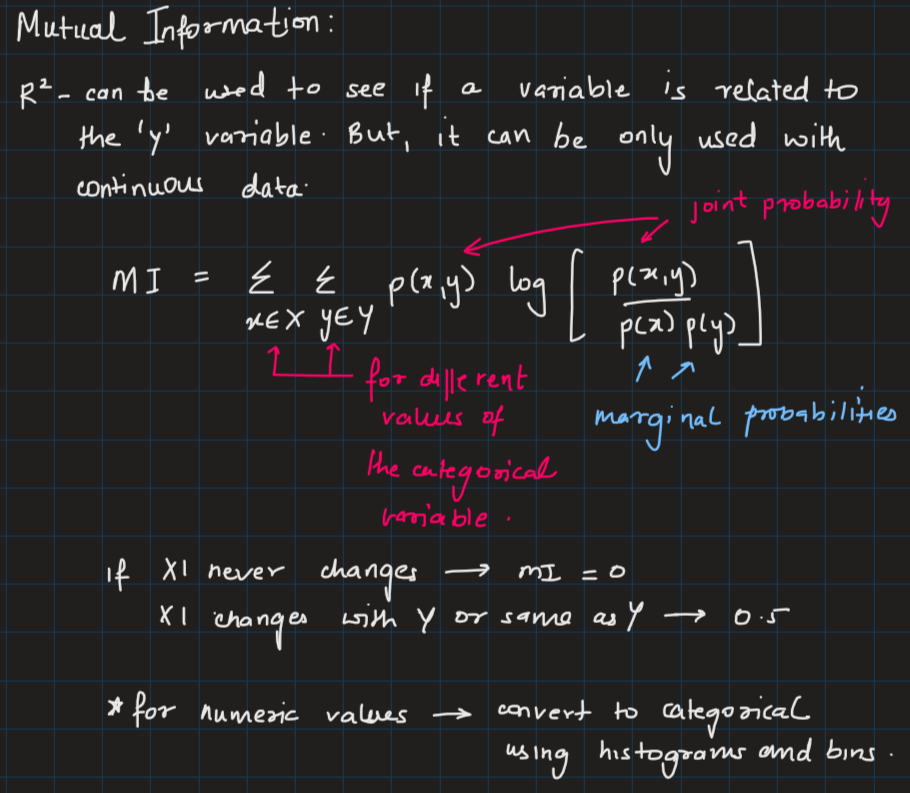
- for categorical columns
- https://en.wikipedia.org/wiki/Mutual_information

In [65]:
from sklearn.metrics import mutual_info_score

In [70]:
for c in categorical:
    print(c, end=' ')
    print(mutual_info_score(df_full_train[c], df_full_train['Churn']).round(3))

gender 0.0
SeniorCitizen 0.01
Partner 0.01
Dependents 0.014
PhoneService 0.0
MultipleLines 0.001
InternetService 0.053
OnlineSecurity 0.063
OnlineBackup 0.045
DeviceProtection 0.042
TechSupport 0.061
StreamingTV 0.031
StreamingMovies 0.031
Contract 0.097
PaperlessBilling 0.019
PaymentMethod 0.043


In [71]:
def mutual_info_score_churn(series):
    return mutual_info_score(series, df_full_train['Churn'])

In [74]:
mi = df_full_train[categorical].apply(mutual_info_score_churn)
mi.sort_values(ascending=False)

Contract            0.096652
OnlineSecurity      0.063393
TechSupport         0.060935
InternetService     0.053313
OnlineBackup        0.045424
PaymentMethod       0.042861
DeviceProtection    0.042007
StreamingTV         0.030844
StreamingMovies     0.030705
PaperlessBilling    0.019077
Dependents          0.014129
Partner             0.010227
SeniorCitizen       0.010059
MultipleLines       0.000654
gender              0.000069
PhoneService        0.000040
dtype: float64

## Feature importance: correlation

Pearsons correlation for numerical columns:
- 0 to 1 -> positive correlation
- 0 to -1 -> negative correlation
- 0 -> very low correlation

In [76]:
df_full_train[numerical].corrwith(df_full_train['Churn']).sort_values(ascending=False)

MonthlyCharges    0.188574
TotalCharges     -0.193370
tenure           -0.344925
dtype: float64

In [77]:
df_full_train[df_full_train.tenure >2 ].Churn.mean()

0.22295938882187374

In [78]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <=12)].Churn.mean()

0.4064814814814815

In [81]:
df_full_train[(df_full_train.tenure > 12) & (df_full_train.tenure <= 40)].Churn.mean()

0.24644549763033174

In [82]:
df_full_train[df_full_train.tenure > 40].Churn.mean()

0.11514052583862194

OHE

In [83]:
# import OHE
from sklearn.feature_extraction import DictVectorizer

In [99]:
dic = df_train[numerical+categorical].to_dict(orient='records')

In [100]:
dv= DictVectorizer(sparse=False).fit(dic)

In [102]:
X_train = dv.transform(dic)

In [103]:
dv.get_feature_names_out()

array(['Contract=Month-to-month', 'Contract=One year',
       'Contract=Two year', 'Dependents=No', 'Dependents=Yes',
       'DeviceProtection=No', 'DeviceProtection=No internet service',
       'DeviceProtection=Yes', 'InternetService=DSL',
       'InternetService=Fiber optic', 'InternetService=No',
       'MonthlyCharges', 'MultipleLines=No',
       'MultipleLines=No phone service', 'MultipleLines=Yes',
       'OnlineBackup=No', 'OnlineBackup=No internet service',
       'OnlineBackup=Yes', 'OnlineSecurity=No',
       'OnlineSecurity=No internet service', 'OnlineSecurity=Yes',
       'PaperlessBilling=No', 'PaperlessBilling=Yes', 'Partner=No',
       'Partner=Yes', 'PaymentMethod=Bank transfer (automatic)',
       'PaymentMethod=Credit card (automatic)',
       'PaymentMethod=Electronic check', 'PaymentMethod=Mailed check',
       'PhoneService=No', 'PhoneService=Yes', 'SeniorCitizen',
       'StreamingMovies=No', 'StreamingMovies=No internet service',
       'StreamingMovies=Yes', '

In [104]:
val_dic = df_val[numerical+categorical].to_dict(orient='records')
X_val = dv.transform(val_dic)

## Logistic Regression

In [106]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, )
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [107]:
model.intercept_[0]

-0.12878547554784334

In [108]:
model.coef_[0].round(3)

array([ 0.55 , -0.207, -0.47 , -0.052, -0.075,  0.035, -0.114, -0.048,
       -0.306,  0.293, -0.114,  0.002, -0.215,  0.123, -0.036,  0.088,
       -0.114, -0.101,  0.238, -0.114, -0.25 , -0.234,  0.107, -0.104,
       -0.023, -0.112, -0.181,  0.255, -0.088,  0.123, -0.25 ,  0.176,
       -0.151, -0.114,  0.138, -0.066, -0.114,  0.054,  0.202, -0.114,
       -0.214,  0.   ,  0.027, -0.154, -0.059])

In [125]:
val_pred = model.predict_proba(X_val)[:, 1]

In [127]:
val_pred = (val_pred > 0.5).astype(int)

In [129]:
val_pred

array([0, 0, 0, ..., 1, 0, 0])

In [131]:

df_val[val_pred == 1].customerID

3       0337-CNPZE
10      2038-OEQZH
11      9846-GKXAS
12      8051-HJRLT
13      8990-ZXLSU
           ...    
1395    2809-ZMYOQ
1396    3536-IQCTX
1400    5196-SGOAK
1401    3050-GBUSH
1406    1031-IIDEO
Name: customerID, Length: 303, dtype: object

## Interpretation

In [132]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'Contract=Month-to-month': 0.55,
 'Contract=One year': -0.207,
 'Contract=Two year': -0.47,
 'Dependents=No': -0.052,
 'Dependents=Yes': -0.075,
 'DeviceProtection=No': 0.035,
 'DeviceProtection=No internet service': -0.114,
 'DeviceProtection=Yes': -0.048,
 'InternetService=DSL': -0.306,
 'InternetService=Fiber optic': 0.293,
 'InternetService=No': -0.114,
 'MonthlyCharges': 0.002,
 'MultipleLines=No': -0.215,
 'MultipleLines=No phone service': 0.123,
 'MultipleLines=Yes': -0.036,
 'OnlineBackup=No': 0.088,
 'OnlineBackup=No internet service': -0.114,
 'OnlineBackup=Yes': -0.101,
 'OnlineSecurity=No': 0.238,
 'OnlineSecurity=No internet service': -0.114,
 'OnlineSecurity=Yes': -0.25,
 'PaperlessBilling=No': -0.234,
 'PaperlessBilling=Yes': 0.107,
 'Partner=No': -0.104,
 'Partner=Yes': -0.023,
 'PaymentMethod=Bank transfer (automatic)': -0.112,
 'PaymentMethod=Credit card (automatic)': -0.181,
 'PaymentMethod=Electronic check': 0.255,
 'PaymentMethod=Mailed check': -0.088,
 'PhoneServ